In [1]:
%pip install -q numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


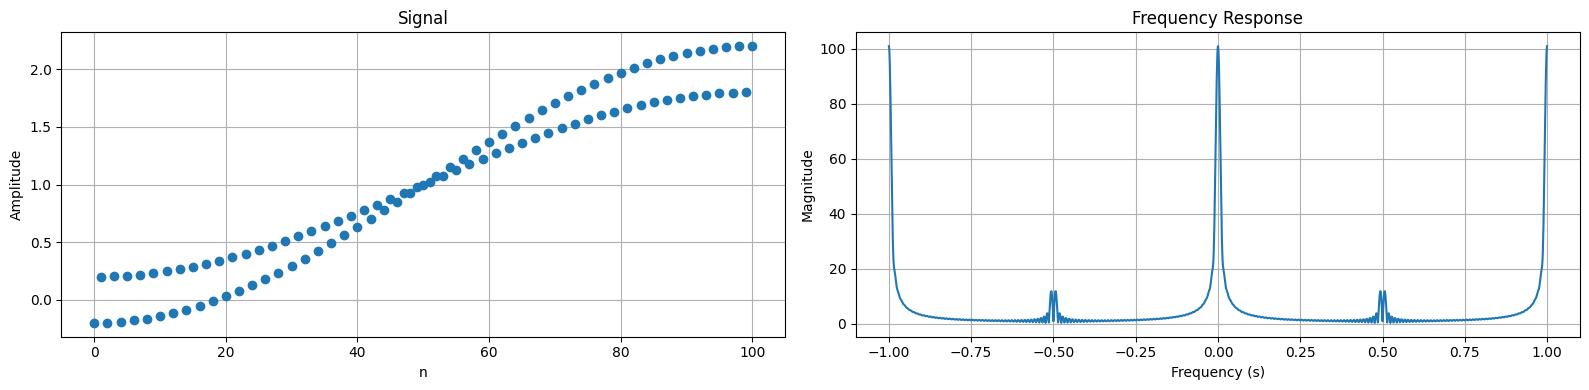

In [2]:
from señal import senial
import numpy as np
import matplotlib.pyplot as plt
from utils import tftd

# Parametros generales
_N = 15 # Cantidad de muestras en el tiempo
_ds = 0.001 # Paso de discretización en frecuencia
_lim = 1 # Rango de frecuencias a analizar [-lim, lim]
_nalumno = 32869 # Número de alumno

# Se grafica la función senial
[n, x] = senial(_nalumno)

# Create a figure with 2 subplots horizontally
plt.figure(figsize=(16, 4))

# Plot the signal
plt.subplot(1, 2, 1)
plt.plot(n, x, 'o')
plt.title("Signal")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.grid()

# Compute the Fourier Transform
[X, s] = tftd(x, n)

# Plot the frequency response
plt.subplot(1, 2, 2)
plt.plot(s, np.abs(X))
plt.title("Frequency Response")
plt.xlabel("Frequency (s)")
plt.ylabel("Magnitude")
plt.grid()

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()


In [3]:
N = _N
delta = np.zeros(N) # Impulso unitario
delta[0] = 1

# Respuesta al impulso, hallada analíticamente
hana1 = np.zeros(N)
hana1[0] = 1/2
hana1[1] = 1/2

hana2 = np.zeros(N)
hana2[0] = 1/2
hana2[1] = -1/2

hana3 = np.zeros(N)
hana3[0] = 1/4
for i in range(1, N):
    hana3[i] = 1/2 ** (i - 1) * (3/8)

hana4 = np.zeros(N)
hana4[0] = 1/4
for i in range(1, N):
    hana4[i] = (-1/2) ** (i - 1) * (-3/8)

# Respuestas en frecuencia, hallada analíticamente
s = np.arange(-_lim, _lim + _ds, _ds)  # Frecuencias en el rango [-1, 1] con paso ds

Hana1 = 1/2 + 1/2 * np.exp(-1j * 2 * np.pi * s)
Hana2 = 1/2 - 1/2 * np.exp(-1j * 2 * np.pi * s)
Hana3 = (0.25 * (1 + np.exp(-1j * 2 * np.pi * s)) / (1 - 0.5 * np.exp(-1j * 2 * np.pi * s)))
Hana4 = (0.25 * (1 - np.exp(-1j * 2 * np.pi * s)) / (1 + 0.5 * np.exp(-1j * 2 * np.pi * s)))

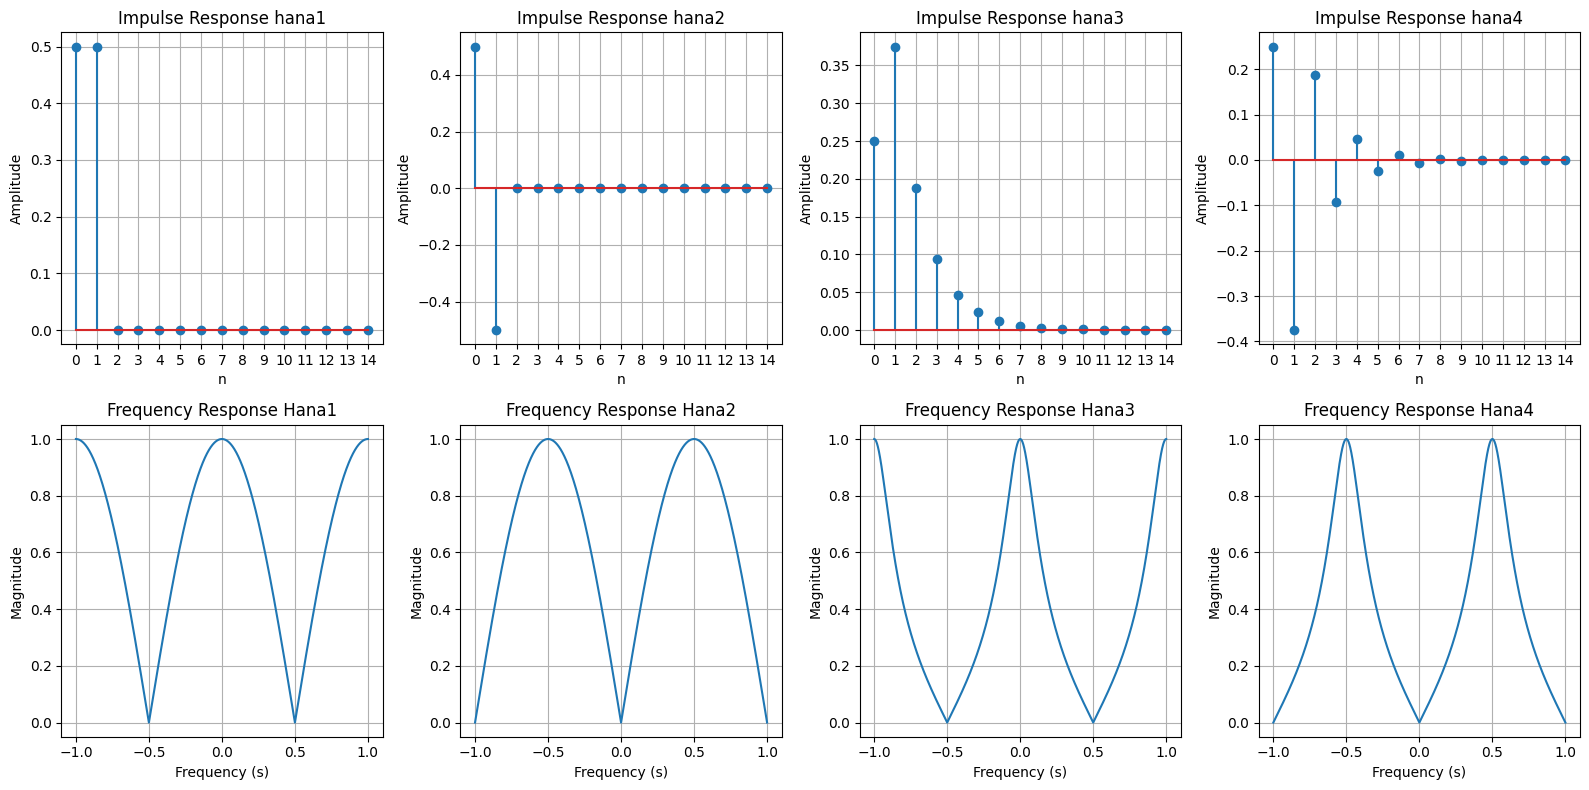

In [4]:
# Create a figure with 8 subplots
plt.figure(figsize=(16, 8))

# Plot impulse response for hana1
plt.subplot(2, 4, 1)
plt.stem(range(N), hana1)
plt.title("Impulse Response hana1")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.xticks(range(N))  # Set integer X-ticks
plt.grid()

# Plot frequency response for Hana1
plt.subplot(2, 4, 5)
plt.plot(s, np.abs(Hana1))
plt.title("Frequency Response Hana1")
plt.xlabel("Frequency (s)")
plt.ylabel("Magnitude")
plt.grid()

# Plot impulse response for hana2
plt.subplot(2, 4, 2)
plt.stem(range(N), hana2)
plt.title("Impulse Response hana2")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.xticks(range(N))  # Set integer X-ticks
plt.grid()

# Plot frequency response for Hana2
plt.subplot(2, 4, 6)
plt.plot(s, np.abs(Hana2))
plt.title("Frequency Response Hana2")
plt.xlabel("Frequency (s)")
plt.ylabel("Magnitude")
plt.grid()

# Plot impulse response for hana3
plt.subplot(2, 4, 3)
plt.stem(range(N), hana3)
plt.title("Impulse Response hana3")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.xticks(range(N))  # Set integer X-ticks
plt.grid()

# Plot frequency response for Hana3
plt.subplot(2, 4, 7)
plt.plot(s, np.abs(Hana3))
plt.title("Frequency Response Hana3")
plt.xlabel("Frequency (s)")
plt.ylabel("Magnitude")
plt.grid()

# Plot impulse response for hana4
plt.subplot(2, 4, 4)
plt.stem(range(N), hana4)
plt.title("Impulse Response hana4")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.xticks(range(N))  # Set integer X-ticks
plt.grid()

# Plot frequency response for Hana4
plt.subplot(2, 4, 8)
plt.plot(s, np.abs(Hana4))
plt.title("Frequency Response Hana4")
plt.xlabel("Frequency (s)")
plt.ylabel("Magnitude")
plt.grid()

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()


In [5]:
from sistemas import sistema1, sistema2, sistema3, sistema4

# Impulso
delta = np.zeros(N)
delta[0] = 1

# Respuestas al impulso digital
hdigital1 = sistema1(delta)
hdigital2 = sistema2(delta)
hdigital3 = sistema3(delta)
hdigital4 = sistema4(delta)

[ Hdigital1, s ] = tftd(hdigital1, np.arange(N))
[ Hdigital2, s ] = tftd(hdigital2, np.arange(N))
[ Hdigital3, s ] = tftd(hdigital3, np.arange(N))
[ Hdigital4, s ] = tftd(hdigital4, np.arange(N))


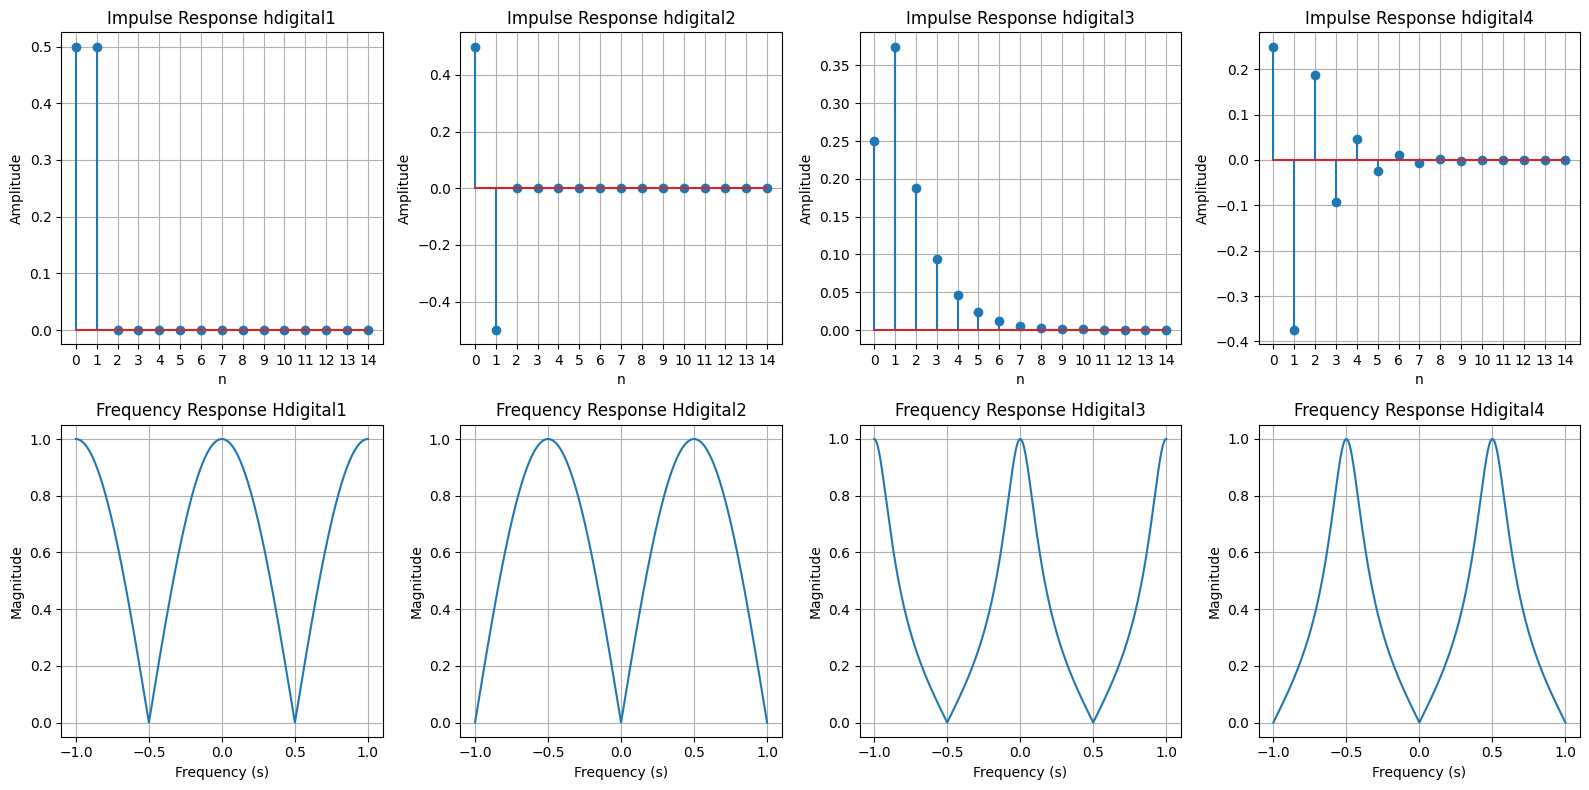

In [6]:
# Plot impulse and frequency responses
plt.figure(figsize=(16, 8))

# Impulse response for hdigital1
plt.subplot(2, 4, 1)
plt.stem(range(N), hdigital1)
plt.title("Impulse Response hdigital1")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.xticks(range(N))  # Set integer X-ticks
plt.grid()

# Frequency response for Hdigital1
plt.subplot(2, 4, 5)
plt.plot(s, np.abs(Hdigital1))
plt.title("Frequency Response Hdigital1")
plt.xlabel("Frequency (s)")
plt.ylabel("Magnitude")
plt.grid()

# Impulse response for hdigital2
plt.subplot(2, 4, 2)
plt.stem(range(N), hdigital2)
plt.title("Impulse Response hdigital2")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.xticks(range(N))  # Set integer X-ticks
plt.grid()

# Frequency response for Hdigital2
plt.subplot(2, 4, 6)
plt.plot(s, np.abs(Hdigital2))
plt.title("Frequency Response Hdigital2")
plt.xlabel("Frequency (s)")
plt.ylabel("Magnitude")
plt.grid()

# Impulse response for hdigital3
plt.subplot(2, 4, 3)
plt.stem(range(N), hdigital3)
plt.title("Impulse Response hdigital3")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.xticks(range(N))  # Set integer X-ticks
plt.grid()

# Frequency response for Hdigital3
plt.subplot(2, 4, 7)
plt.plot(s, np.abs(Hdigital3))
plt.title("Frequency Response Hdigital3")
plt.xlabel("Frequency (s)")
plt.ylabel("Magnitude")
plt.grid()

# Impulse response for hdigital4
plt.subplot(2, 4, 4)
plt.stem(range(N), hdigital4)
plt.title("Impulse Response hdigital4")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.xticks(range(N))  # Set integer X-ticks
plt.grid()

# Frequency response for Hdigital4
plt.subplot(2, 4, 8)
plt.plot(s, np.abs(Hdigital4))
plt.title("Frequency Response Hdigital4")
plt.xlabel("Frequency (s)")
plt.ylabel("Magnitude")
plt.grid()

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()


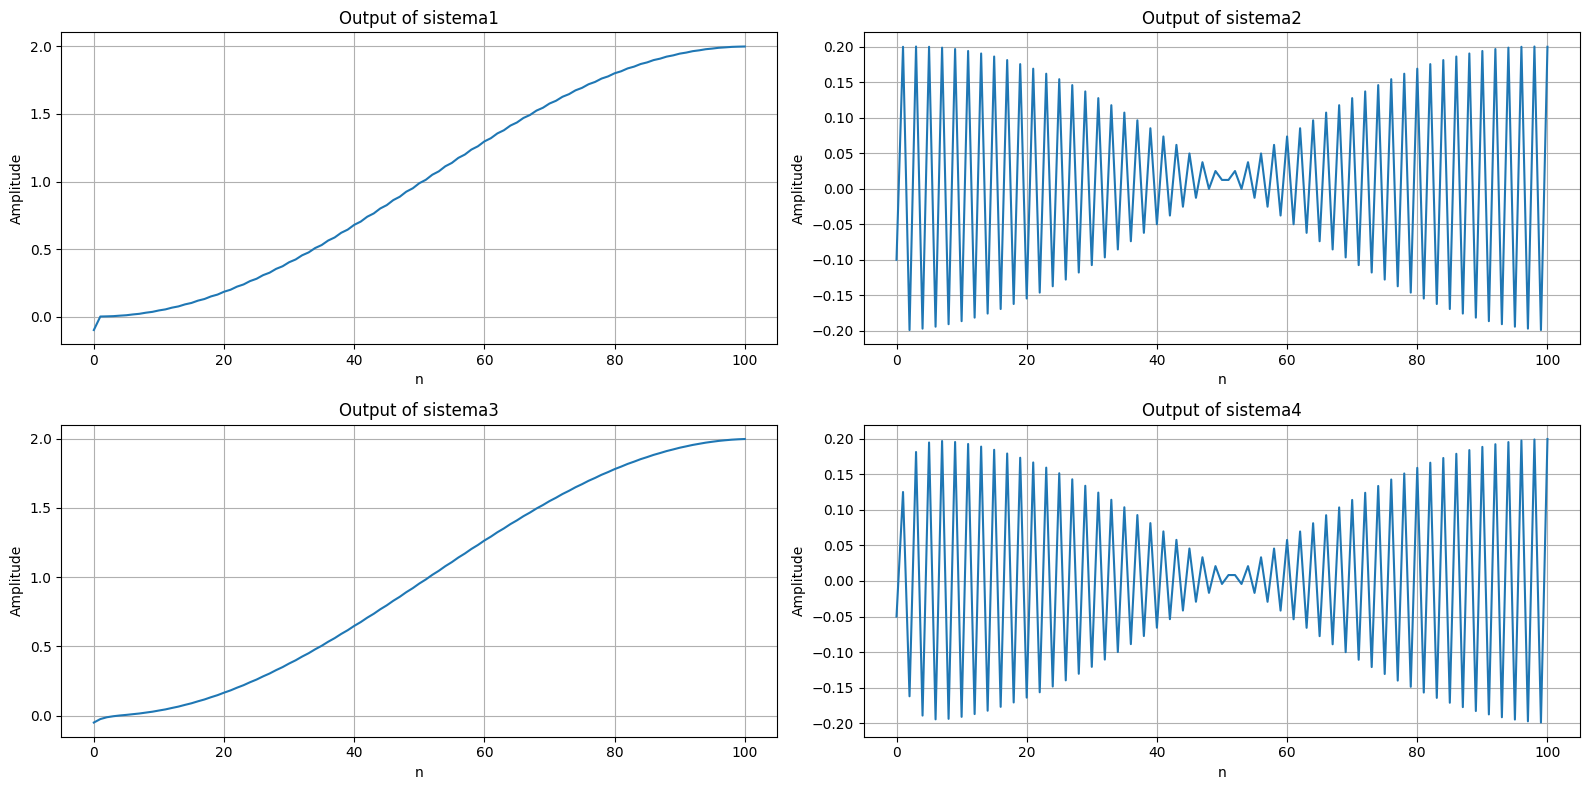

In [7]:
y1 = sistema1(x)
y2 = sistema2(x)
y3 = sistema3(x)
y4 = sistema4(x)

plt.figure(figsize=(16, 8))
# Plot y1
plt.subplot(2, 2, 1)
plt.plot(n, y1)
plt.title("Output of sistema1")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.grid()

# Plot y2
plt.subplot(2, 2, 2)
plt.plot(n, y2)
plt.title("Output of sistema2")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.grid()

# Plot y3
plt.subplot(2, 2, 3)
plt.plot(n, y3)
plt.title("Output of sistema3")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.grid()

# Plot y4
plt.subplot(2, 2, 4)
plt.plot(n, y4)
plt.title("Output of sistema4")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.grid()

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

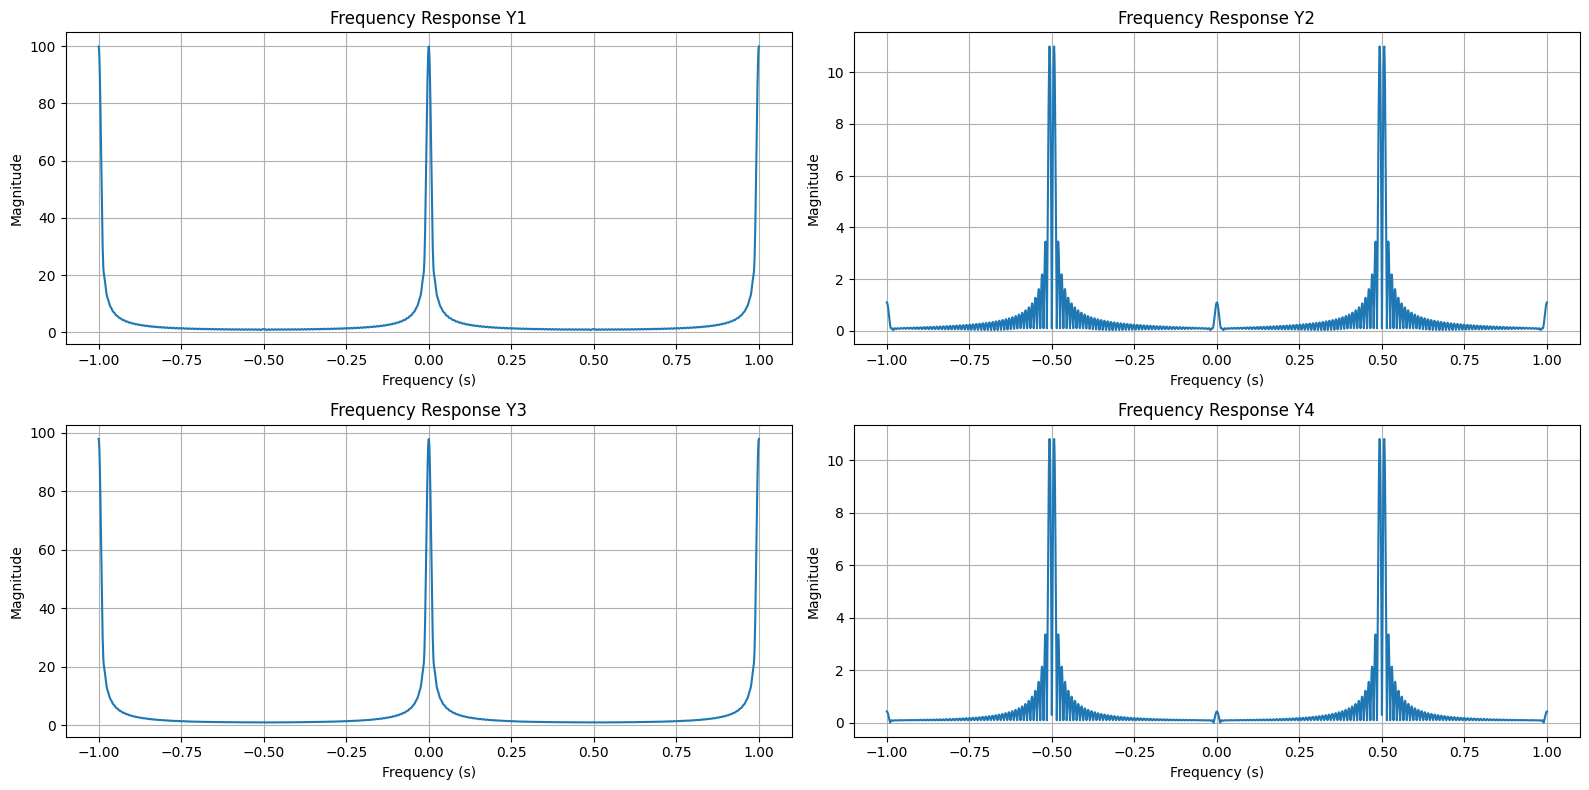

In [8]:
# Apply TFTD to each of the y1, y2, y3, and y4 arrays
[Y1, s] = tftd(y1, n)
[Y2, s] = tftd(y2, n)
[Y3, s] = tftd(y3, n)
[Y4, s] = tftd(y4, n)

# Plot the results
plt.figure(figsize=(16, 8))

# Plot frequency response for Y1
plt.subplot(2, 2, 1)
plt.plot(s, np.abs(Y1))
plt.title("Frequency Response Y1")
plt.xlabel("Frequency (s)")
plt.ylabel("Magnitude")
plt.grid()

# Plot frequency response for Y2
plt.subplot(2, 2, 2)
plt.plot(s, np.abs(Y2))
plt.title("Frequency Response Y2")
plt.xlabel("Frequency (s)")
plt.ylabel("Magnitude")
plt.grid()

# Plot frequency response for Y3
plt.subplot(2, 2, 3)
plt.plot(s, np.abs(Y3))
plt.title("Frequency Response Y3")
plt.xlabel("Frequency (s)")
plt.ylabel("Magnitude")
plt.grid()

# Plot frequency response for Y4
plt.subplot(2, 2, 4)
plt.plot(s, np.abs(Y4))
plt.title("Frequency Response Y4")
plt.xlabel("Frequency (s)")
plt.ylabel("Magnitude")
plt.grid()

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()